In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from itertools import combinations

In [2]:
# Import network
G = nx.read_gexf('../data/processed/network/network.gexf')

# Get the identifier for the first node
first_node = list(G.nodes())[0]
attributes = G.nodes[first_node]

# Print the attributes of the nodes
print(f"Attributes:")
for attr_name, attr_value in attributes.items():
    print(f"{attr_name}")


Attributes:
Reputation
CreationDate
LastAccessDate
Views
UpVotes
DownVotes
PostCount
CommentCount
AcceptedAnswerCount
AnswerCount
TotalActivity
AvgAnswerScore
AvgPostScore
AcceptedAnswerFraction
AnswerSentiment
label


In [3]:
# Degree distribution histogram

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Print degree distribution with the format: degree, count
print("Degree, Count")
for d in np.unique(degree_sequence):
    print(f"Degree: {d}, Count: {degree_sequence.count(d)}")


Degree, Count
Degree: 0, Count: 5951
Degree: 1, Count: 2217
Degree: 2, Count: 1224
Degree: 3, Count: 751
Degree: 4, Count: 479
Degree: 5, Count: 308
Degree: 6, Count: 188
Degree: 7, Count: 143
Degree: 8, Count: 89
Degree: 9, Count: 58
Degree: 10, Count: 56
Degree: 11, Count: 45
Degree: 12, Count: 28
Degree: 13, Count: 27
Degree: 14, Count: 25
Degree: 15, Count: 25
Degree: 16, Count: 20
Degree: 17, Count: 12
Degree: 18, Count: 18
Degree: 19, Count: 8
Degree: 20, Count: 11
Degree: 21, Count: 10
Degree: 22, Count: 5
Degree: 23, Count: 6
Degree: 24, Count: 6
Degree: 25, Count: 6
Degree: 26, Count: 3
Degree: 27, Count: 3
Degree: 28, Count: 8
Degree: 29, Count: 2
Degree: 30, Count: 3
Degree: 31, Count: 2
Degree: 32, Count: 2
Degree: 33, Count: 2
Degree: 34, Count: 2
Degree: 35, Count: 5
Degree: 36, Count: 3
Degree: 37, Count: 1
Degree: 38, Count: 3
Degree: 39, Count: 2
Degree: 40, Count: 1
Degree: 41, Count: 2
Degree: 42, Count: 1
Degree: 44, Count: 3
Degree: 46, Count: 2
Degree: 48, Count: 

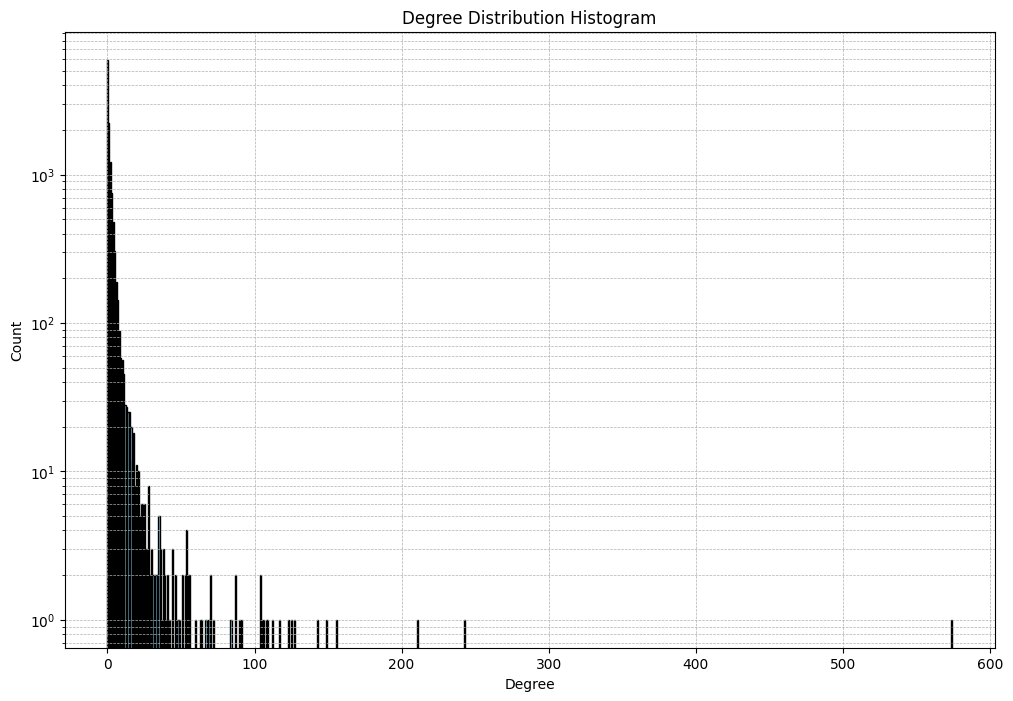

In [4]:
# Degree distribution data
degrees = np.unique(degree_sequence)
counts = [degree_sequence.count(d) for d in degrees]

# Plotting the degree distribution as a bar plot
plt.figure(figsize=(12, 8))
plt.bar(degrees, counts, width=0.8, color='skyblue', edgecolor='black')

# Since you have a wide range of degrees, you might want to use a log scale
plt.yscale('log')

# Adding labels and title
plt.title("Degree Distribution Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


In [5]:
# List of nodes with the highest degree
print("Nodes with the highest degree and their sentiment:")
for node, degree in sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Node {node}: {degree} connections")


Nodes with the highest degree and their sentiment:
Node 104349: 574 connections
Node 2988730: 243 connections
Node 642070: 211 connections
Node 2823755: 156 connections
Node 16343464: 149 connections
Node 51685: 143 connections
Node 126214: 127 connections
Node 1453822: 125 connections
Node 166749: 123 connections
Node 2390182: 117 connections


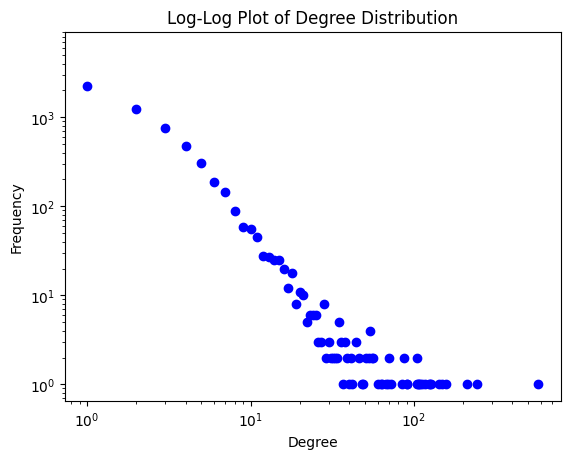

In [6]:
# Log-Log plot

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.plot(deg, cnt, 'bo')
plt.title("Log-Log Plot of Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


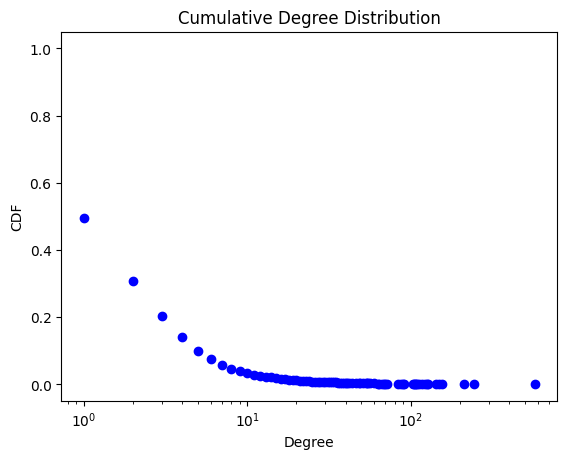

In [7]:
# Cumulative degree distribution

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

cnt_array = np.array(cnt, dtype=float)
cdf = np.cumsum(cnt_array) / sum(cnt_array)

fig, ax = plt.subplots()
plt.plot(deg, cdf, 'bo')
plt.title("Cumulative Degree Distribution")
plt.ylabel("CDF")
plt.xlabel("Degree")
ax.set_xscale('log')
# ax.set_yscale('log') # Optional: Log scale for the y-axis
plt.show()


In [8]:
# Degree Centrality

centrality = nx.degree_centrality(G)
# Sort nodes by degree centrality
central_nodes = sorted(centrality, key=centrality.get, reverse=True)


In [9]:
# Print the 20 nodes with highest degree centrality
print("Nodes with the highest degree centrality and their sentiment:")
count = 1
for node in central_nodes[:20]:
    print(f"{count} Node {node}: {centrality[node]:.4f}")
    count += 1

Nodes with the highest degree centrality and their sentiment:
1 Node 104349: 0.0486
2 Node 2988730: 0.0206
3 Node 642070: 0.0179
4 Node 2823755: 0.0132
5 Node 16343464: 0.0126
6 Node 51685: 0.0121
7 Node 126214: 0.0108
8 Node 1453822: 0.0106
9 Node 166749: 0.0104
10 Node 2390182: 0.0099
11 Node 1322401: 0.0095
12 Node 6622587: 0.0092
13 Node 893: 0.0091
14 Node 6045800: 0.0090
15 Node 4492932: 0.0089
16 Node 84270: 0.0088
17 Node 651174: 0.0088
18 Node 699305: 0.0077
19 Node 5741205: 0.0076
20 Node 4333359: 0.0074


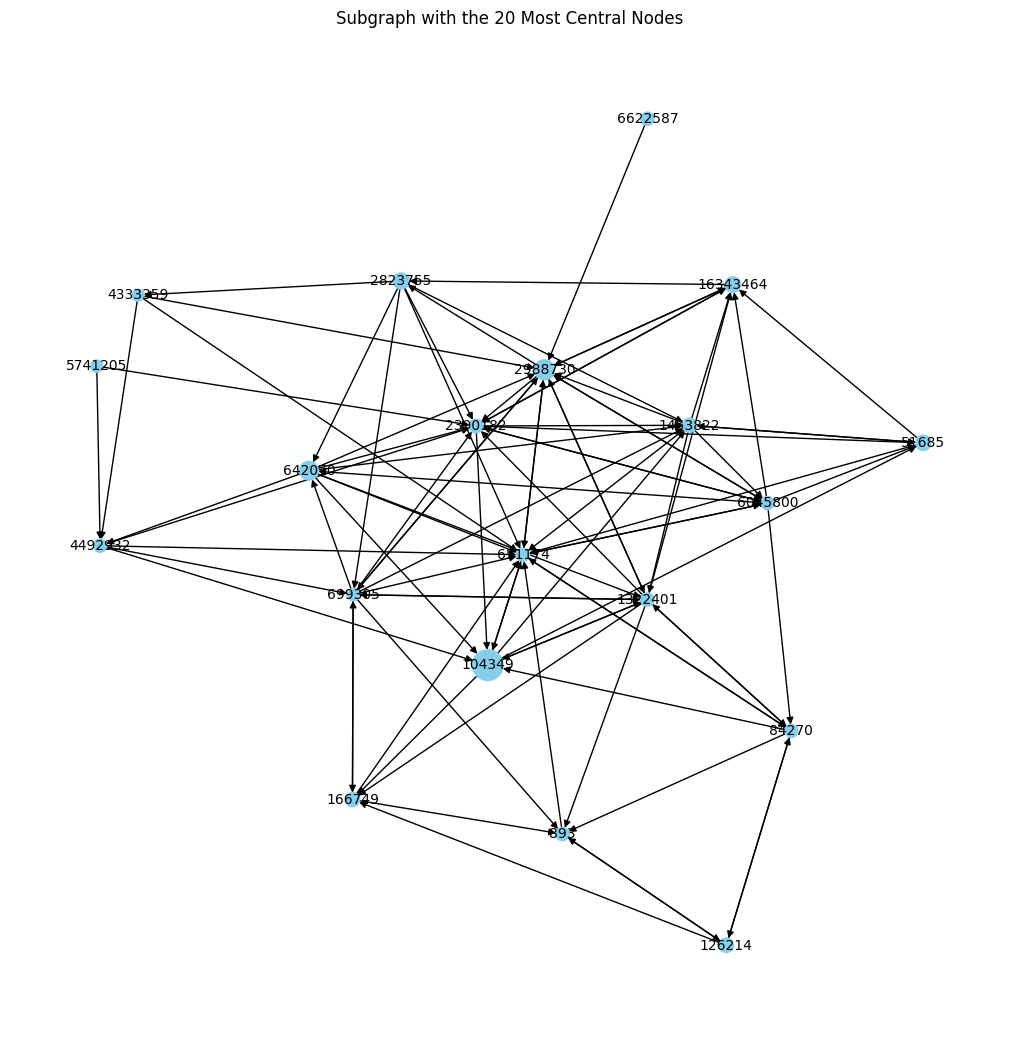

In [10]:
# Visualize the 20 most central nodes (hubs) and their edges
top_central_nodes = central_nodes[:20]

# Create a subgraph with these nodes
subgraph = G.subgraph(top_central_nodes)

# Use a layout for positioning nodes on the plot
pos = nx.kamada_kawai_layout(subgraph)
# pos = nx.spring_layout(subgraph)

# Extract the 'AnswerSentiment' for each node to use as labels and truncate to 4 decimal places
# labels = {n: f"{G.nodes[n]['AnswerSentiment']:.4f}" for n in subgraph}

# Draw the subgraph
plt.figure(figsize=(10, 10))
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=[centrality[n]*10000 for n in subgraph], edge_color='k', linewidths=1, font_size=10)
# nx.draw(subgraph, pos, node_color='skyblue', node_size=[centrality[n]*10000 for n in subgraph], edge_color='k', linewidths=1, font_size=10)

# # Draw the custom labels
# nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=12)

# Display the plot
plt.title("Subgraph with the 20 Most Central Nodes")
plt.show()
